# Computer Vision - Convolutional Neural Network

In [17]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [18]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# import zipfile

# # Unzip the data
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## CNN Model - Binary Classification

### Pre-processing the data

In [19]:
# Dataset directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [20]:
# Train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:
# Loading images and turning them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [23]:
# Number of batches
print(len(train_data), len(test_data))
# Based on the number of images
print(1500 / len(images))

47 16
46.875


In [24]:
# Check if the images were scaled on a batch sample
images[0], images[0].shape

(array([[[0.27450982, 0.        , 0.        ],
         [0.2784314 , 0.00392157, 0.00392157],
         [0.28235295, 0.        , 0.00392157],
         ...,
         [0.05882353, 0.01568628, 0.        ],
         [0.0627451 , 0.00784314, 0.        ],
         [0.0627451 , 0.00784314, 0.        ]],
 
        [[0.3647059 , 0.01568628, 0.        ],
         [0.36862746, 0.01176471, 0.        ],
         [0.3803922 , 0.01176471, 0.00392157],
         ...,
         [0.0627451 , 0.00784314, 0.        ],
         [0.07058824, 0.01176471, 0.        ],
         [0.07450981, 0.01568628, 0.00392157]],
 
        [[0.49411768, 0.01568628, 0.        ],
         [0.49411768, 0.01568628, 0.        ],
         [0.5019608 , 0.01960784, 0.        ],
         ...,
         [0.08235294, 0.01176471, 0.        ],
         [0.08627451, 0.01568628, 0.        ],
         [0.09411766, 0.01960784, 0.00392157]],
 
        ...,
 
        [[0.9294118 , 0.7568628 , 0.65882355],
         [0.95294124, 0.7686275 , 0.66666

In [25]:
# View the batch labels
labels, labels.shape

(array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.],
       dtype=float32),
 (32,))

### Creating baseline CNN model

In [26]:
# Simplifying the model creation
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [27]:
# Creating 3-layer CNN model
model_cnn1 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [32]:
# Compiling the model
model_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [33]:
# Model summary
model_cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Legth of training and testing data in batches
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_cnn1 = model_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 1.1354 - accuracy: 0.6387 - val_loss: 0.5081 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4878 - accuracy: 0.7853 - val_loss: 0.3796 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 53s 1s/step - loss: 0.3847 - accuracy: 0.8300 - val_loss: 0.3748 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 50s 1s/step - loss: 0.2792 - accuracy: 0.9027 - val_loss: 0.3238 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 43s 914ms/step - loss: 0.1431 - accuracy: 0.9507 - val_loss: 0.4150 - val_accuracy: 0.8180


### Evaluating CNN model

<AxesSubplot:>

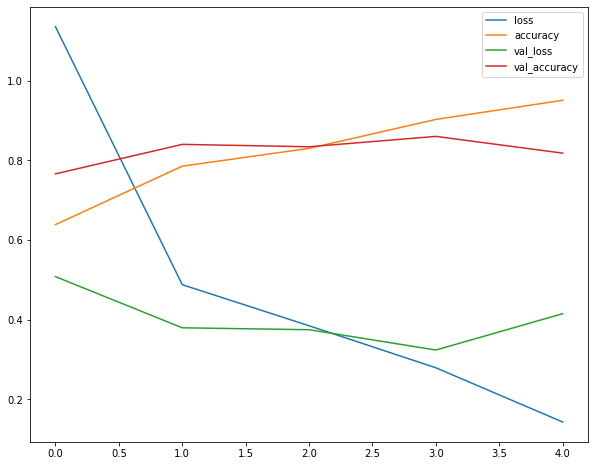

In [42]:
# Plotting the history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_cnn1.history).plot(figsize=(10, 8))

In [43]:
# Plotting function for each metric
def plot_loss_curves(history):
    # Loss values
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Accuracy values
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # Number of epochs
    epochs = range(len(history.history["loss"]))

    # Plot losses
    plt.plot(epochs, loss, label="Training_Loss")
    plt.plot(epochs, val_loss, label="Validation_Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training_Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation_Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

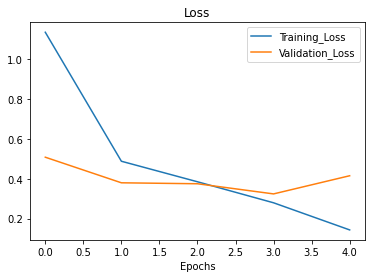

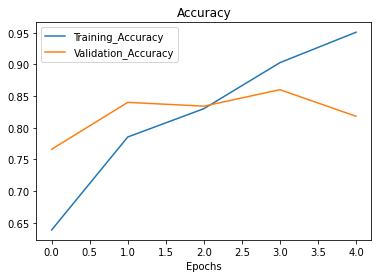

In [44]:
plot_loss_curves(history_cnn1)

### Adjusting parameters to improve CNN model's performance

In [46]:
# Creating a model
model_cnn2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [47]:
# Compiling the model
model_cnn2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [48]:
# Fit the model
history_cnn2 = model_cnn2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 543ms/step - loss: 0.6441 - accuracy: 0.6287 - val_loss: 0.5009 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 24s 509ms/step - loss: 0.4930 - accuracy: 0.7847 - val_loss: 0.4623 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 24s 510ms/step - loss: 0.4521 - accuracy: 0.7993 - val_loss: 0.3844 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 28s 603ms/step - loss: 0.4220 - accuracy: 0.8047 - val_loss: 0.4463 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 28s 596ms/step - loss: 0.4056 - accuracy: 0.8193 - val_loss: 0.3571 - val_accuracy: 0.8440


In [49]:
# Model's summary
model_cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)      

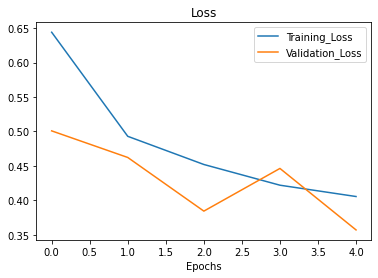

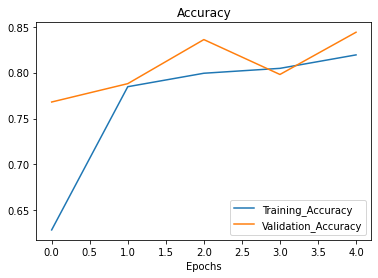

In [50]:
# Plotting the curves
plot_loss_curves(history_cnn2)

### Data augmentation

In [51]:
# Training data with augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Training data without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Test data without augmentation
test_datagen_augmented = ImageDataGenerator(rescale=1/255.)